In [35]:
#todo put this in an enum to use
Run = 1
Walk  = 2
Hike  = 3
Ride  = 4
Swim  = 5
Workout  = 6
VirtualRide  = 7
AlpineSki  = 8

import pandas as pd
with pd.HDFStore('streams.h5','r') as store:
    df = store.select('streams',columns=['time','distance','velocity_smooth','heartrate','id'],where=['type==1'])
#get rid of times greater than 24 hours...or 86400 seconds
df = df[df['time'] < 86400]

In [36]:
df.head()

,time,distance,velocity_smooth,heartrate,id
0,0,0.000000,0.0,61.0,100401452
1,1,0.000746,1.2,61.0,100401452
7,7,0.014232,3.3,61.0,100401452
12,12,0.021939,3.1,61.0,100401452
16,16,0.031386,3.1,61.0,100401452


# General Activity Viz

In [37]:
act_df = pd.read_csv('activities_cleaned.csv')

## Kudos Viz

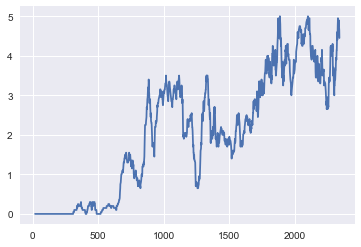

In [38]:
%matplotlib inline
act_df[act_df['type']=='Run'].kudos_count.rolling(20).mean().plot()

In [39]:
temp_df = act_df[act_df['type']=='Run']
temp_df = temp_df[temp_df.kudos_count>0]
temp_df['pace'] = 1/(temp_df.average_speed*0.0372823)
temp_df = temp_df[temp_df.pace < 10]

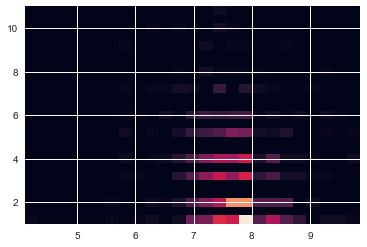

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
#pace[pd.np.isnan(pace)]
blah = plt.hist2d(temp_df.pace.values, temp_df.kudos_count.astype(float),bins=25)

In [41]:
temp_df.pace.corr(temp_df.kudos_count)

-0.13601021629563464

# Heartrate Viz

In [42]:
temp_df = act_df[act_df['type']=='Run']
temp_df = temp_df[pd.notnull(temp_df.average_heartrate)]
temp_df['pace'] = 1/(temp_df.average_speed.astype(float)*0.0372823)
temp_df = temp_df[temp_df.pace < 10]

<IPython.core.display.Javascript object>


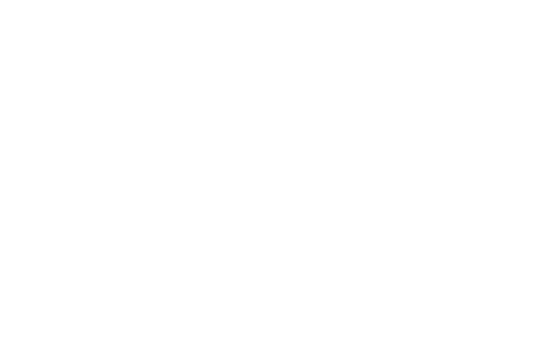

<IPython.core.display.Javascript object>


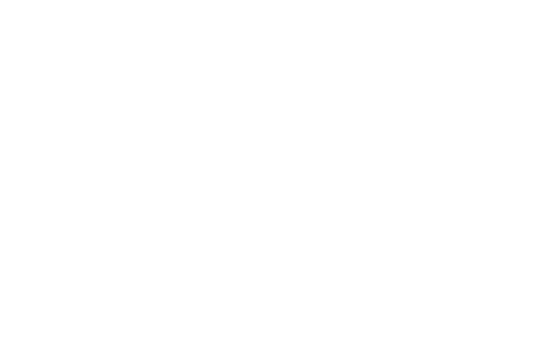

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
#pace[pd.np.isnan(pace)]
blah = plt.hist2d(temp_df.pace.values, temp_df.average_heartrate.astype(float),bins=30)

In [44]:
temp_df.pace.corr(temp_df.average_heartrate)

-0.54323364707559518

# Try this in Seaborn

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [46]:
temp_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'achievement_count', 'athlete_count',
       'average_cadence', 'average_heartrate', 'average_speed', 'average_temp',
       'average_watts', 'best_efforts', 'calories', 'comment_count', 'commute',
       'description', 'device_name', 'device_watts', 'distance',
       'elapsed_time', 'elev_high', 'elev_low', 'embed_token', 'external_id',
       'flagged', 'gear', 'gear_id', 'guid', 'has_heartrate', 'has_kudoed',
       'id', 'instagram_primary_photo', 'kilojoules', 'kudos_count',
       'location_city', 'location_country', 'location_state', 'manual',
       'max_heartrate', 'max_speed', 'max_watts', 'moving_time', 'name',
       'partner_brand_tag', 'partner_logo_url', 'photo_count', 'photos',
       'pr_count', 'private', 'resource_state', 'segment_efforts',
       'splits_metric', 'splits_standard', 'start_date', 'start_date_local',
       'start_latitude', 'start_longitude', 'suffer_score', 'timezone',
       'total_elevation_gain', 'total_photo

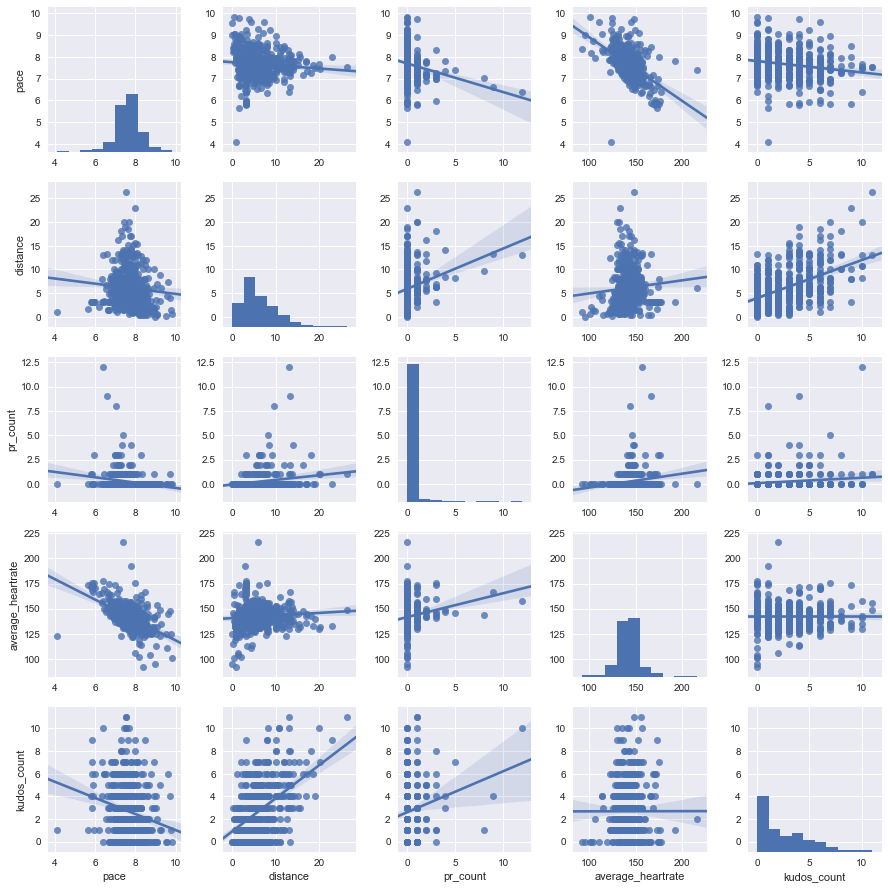

In [47]:
%matplotlib inline
g = sns.pairplot(temp_df[['pace','distance','pr_count','average_heartrate','kudos_count']].dropna(), kind="reg",dropna=True)

# HoloViews


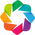

In [48]:
import holoviews as hv
from holoviews.operation import gridmatrix
hv.extension('bokeh', 'matplotlib', width="75")

In [49]:
%%opts Bivariate [bandwidth=0.5] (cmap='Blues') Points (size=2)
%%opts Points    [tools=['box_select']]

temp_df = temp_df[pd.notnull(temp_df.average_heartrate)]
act_ds = hv.Dataset(temp_df[['pace','distance','average_heartrate']].dropna())

density_grid = gridmatrix(act_ds, diagonal_type=hv.Distribution, chart_type=hv.Bivariate)
point_grid = gridmatrix(act_ds, chart_type=hv.Points)

density_grid * point_grid

:GridMatrix   [X,Y]
   :Overlay
      .Distribution.I :Distribution   [pace]   (Density)
      .Histogram.I    :Histogram   [pace]   (pace_frequency)

In [ ]:
-- biking
-- swimming

# Biking Plots

In [61]:
bike_df = act_df[(act_df['type']=='Ride') | (act_df['type']=='VirtualRide')]
bike_df = bike_df[pd.notnull(bike_df.average_heartrate)]
bike_df['average_speed'] = bike_df['average_speed']*3600/1609

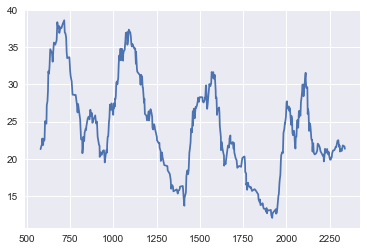

In [64]:
bike_df.distance.rolling(20).mean().plot()

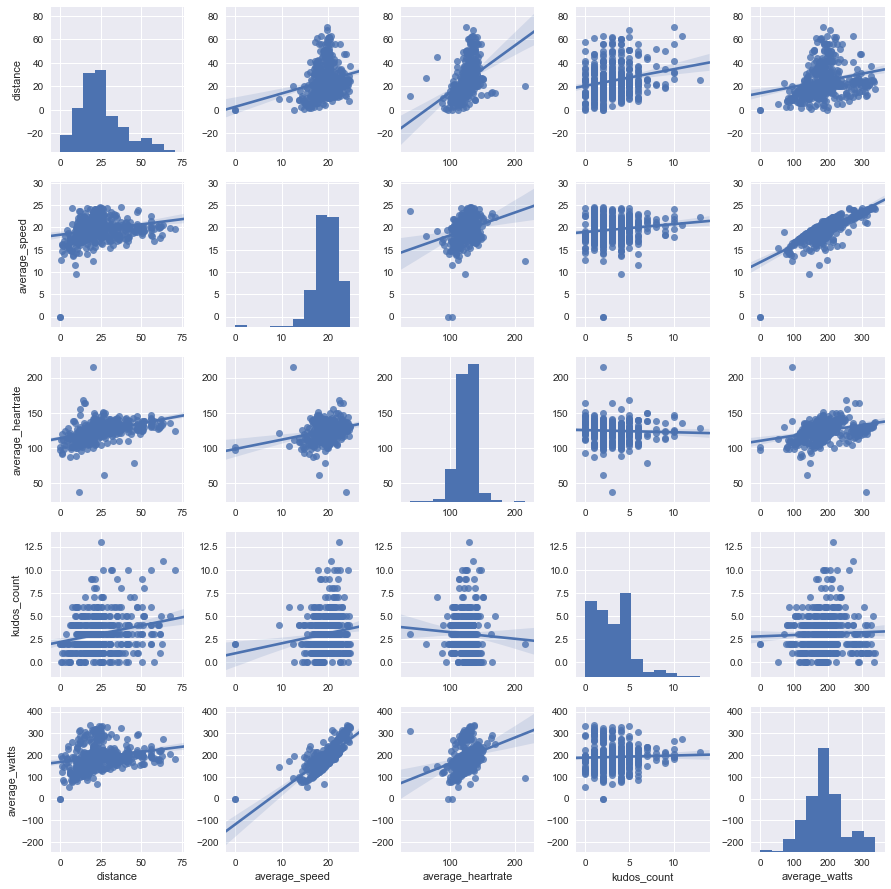

In [65]:
g = sns.pairplot(bike_df[['distance','average_speed','average_heartrate','kudos_count','average_watts']].dropna(), kind="reg",dropna=True)

# Swimming Plots

In [78]:
swim_df = act_df[(act_df['type']=='Swim')]
swim_df = swim_df[swim_df.average_speed > 0]
swim_df['100yd_pace'] = 1/swim_df.average_speed/60*100*0.914

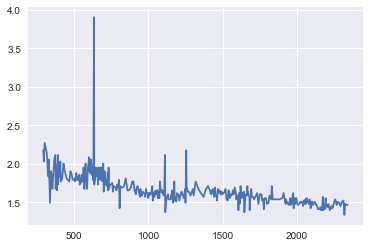

In [79]:
swim_df['100yd_pace'].plot()

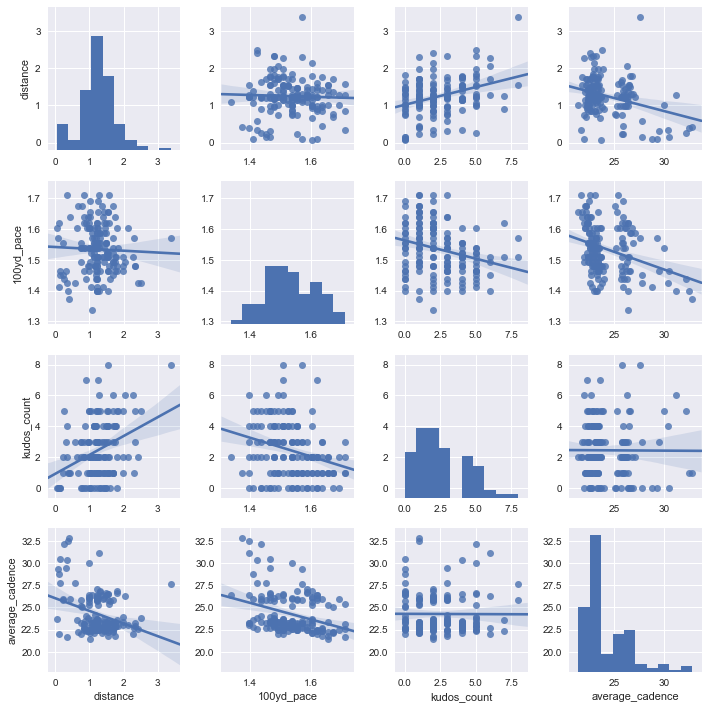

In [80]:
g = sns.pairplot(swim_df[['distance','100yd_pace','kudos_count','average_cadence']].dropna(), kind="reg",dropna=True)